이미지 센터 찾기

In [1]:
import os
import glob
import pydicom
import nibabel as nib
import pandas as pd
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from tqdm import tqdm

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from utils.dcm_utils import *
from utils.nii_utils import *
from utils.train_utils import *

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T
from torchvision.transforms import Compose, ToTensor, Normalize, Resize, CenterCrop
import torchvision.transforms.functional as TF

In [2]:
patient_id = "1.2.826.0.1.3680043.8693"

In [3]:
DATA_DIR = "/media/longyi/SSD9701/"
TRAIN_IMAGES_DIR = os.path.join(DATA_DIR, "train_images")

In [4]:
patient_dir = os.path.join(TRAIN_IMAGES_DIR, patient_id)
imgs, image_positions, image_orientations, pixel_spacings, slice_thicknesses, is_flip = read_patient_dcm(patient_dir)

69
(69, 3)


In [6]:
imgs.shape

(69, 512, 512)

In [9]:
pixel_spacings[0]

array([0.488281, 0.488281])

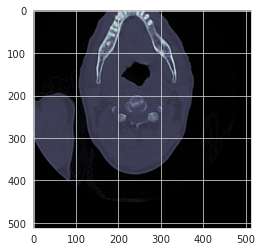

In [8]:
plt.imshow(imgs[20, :, :], cmap='bone')

In [16]:
idx = 20
img_tensor = torch.tensor(imgs[idx, :, :]).unsqueeze(0).unsqueeze(0)
img_tensor.shape

torch.Size([1, 1, 512, 512])

In [15]:
filter_size = int(100 / pixel_spacings[0, 0])


torch.Size([1, 1, 204, 204])

In [22]:
conv_out = F.avg_pool2d(img_tensor, kernel_size=(filter_size, filter_size), stride=1, padding=101)
conv_out.shape

torch.Size([1, 1, 511, 511])

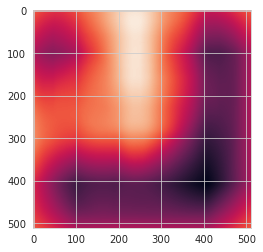

In [23]:
plt.imshow(conv_out.squeeze())

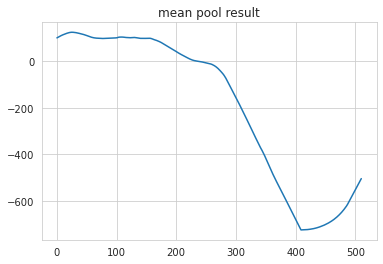

In [27]:
plt.plot(conv_out.squeeze()[:, 250])
plt.title('mean pool result')
plt.show()

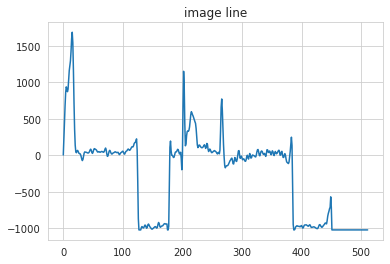

In [28]:
plt.plot(img_tensor[0,0,:, 250])
plt.title("image line")
plt.show()

이걸 갖고 대략적인 위치를 판단할 수 있지 않을까?

threshold 를 초과하는 개수를 counting 하기


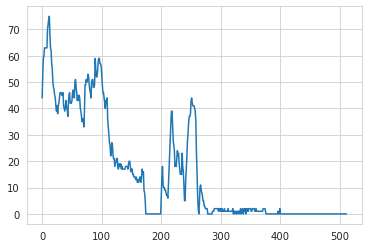

In [42]:
threshold = 0.6
tensor = img_tensor.squeeze().clone()
tensor = normalize_hu(tensor)
tensor[tensor < threshold] = 0
non_zero = torch.count_nonzero(tensor, dim=1)
plt.plot(non_zero)
plt.show()

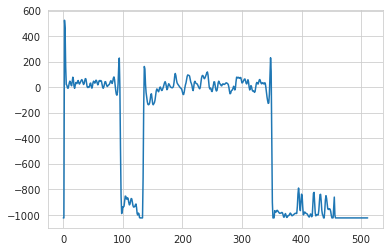

In [32]:
plt.plot(img_tensor.squeeze()[300, :])
plt.show()